# Import libs

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import data

In [2]:
df = pd.read_csv(r'/Users/r1121/Desktop/CF/11-2023Food Price Project/Data/Modified/food_price_global_varclean.csv', index_col = 0)

# Create a subset of data about eggs price in Europe (countries using euro)

In [3]:
df.head(15)

,_id,country,food_type,baseline_local,local_price,variation_local,local_currency,local_range,date
0,1,Isle Of Man,Bread and other bakers wares (1kg),2.80,2.89,3.21,£,1.61-3.99,2020-07-19
1,2,Marshall Islands,"Meat of chickens, fresh or chilled (1kg)",4.45,4.45,0.00,$,4.41-4.5,2020-07-19
2,3,Timor-Leste,Rice (1kg),1.88,1.92,2.13,$,0.75-3,2020-07-19
3,4,Burkina Faso,Potatoes (1kg),682.00,682.00,0.00,CFA,600.01-763.99,2020-07-19
4,5,Angola,"Meat of cattle, fresh or chilled (1kg)",10.84,12.43,14.67,$,9.68-15.61,2020-07-19
5,6,Burkina Faso,Lettuce and chicory (1head),437.00,437.00,0.00,CFA,200.00-674.00,2020-07-19
6,7,Maldives,"Meat of chickens, fresh or chilled (1kg)",63.27,63.76,0.77,Rf,47.99-85.01,2020-07-19
7,8,Lesotho,Hen eggs in shell (12),24.53,27.00,10.07,R,24.00-30.00,2020-07-19
8,9,Senegal,Rice (1kg),452.61,450.01,-0.57,CFA,350.01-500.01,2020-07-19
9,10,Mali,Hen eggs in shell (12),1.52,1.86,22.37,$,1.01-2.04,2020-07-19


In [4]:
df.shape

(49807, 9)

## Due to the scale of our client and perishability of eggs, we will focus on European countries using euro. And since client is looking for suppliers of eggs, we will use data about eggs price.

In [7]:
# creat a subset about eggs in Europe.

df_ee = df.loc[(df['food_type']=='Hen eggs in shell (12)')&(df['local_currency']=='€')]

In [8]:
df_ee.head(10)

,_id,country,food_type,baseline_local,local_price,variation_local,local_currency,local_range,date
217,218,Martinique,Hen eggs in shell (12),3.94,4.25,7.87,€,2.97-4.85,2020-07-19
416,417,Andorra,Hen eggs in shell (12),2.35,2.52,7.23,€,1.50-3.60,2020-07-19
792,793,Martinique,Hen eggs in shell (12),3.94,3.94,0.00,€,2.97-4.85,2020-04-05
819,820,Andorra,Hen eggs in shell (12),2.35,2.35,0.00,€,1.50-3.60,2020-04-05
928,929,Martinique,Hen eggs in shell (12),3.94,4.25,7.87,€,2.97-4.85,2021-04-04
1013,1014,San Marino,Hen eggs in shell (12),3.78,2.63,-30.42,€,2.00-3.00,2021-04-04
1337,1338,Andorra,Hen eggs in shell (12),2.35,2.52,7.23,€,1.50-3.60,2021-04-04
1613,1614,Martinique,Hen eggs in shell (12),3.94,4.25,7.87,€,2.97-4.85,2020-07-05
1679,1680,Andorra,Hen eggs in shell (12),2.35,2.52,7.23,€,1.50-3.60,2020-07-05
2291,2292,Martinique,Hen eggs in shell (12),3.94,4.25,7.87,€,2.97-4.85,2020-08-16


In [9]:
df_ee.shape

(477, 9)

# Clean the new data set

## Missing value

In [10]:
df_ee.isnull().sum()

_id                0
country            0
food_type          0
baseline_local     0
local_price        0
variation_local    0
local_currency     0
local_range        0
date               0
dtype: int64

## Duplicates

In [11]:
dup = df_ee.duplicated()

In [12]:
dup.shape

(477,)

## Mixed types

In [13]:
for col in df_ee.columns.tolist():
  weird = (df_ee[[col]].applymap(type) != df_ee[[col]].iloc[0].apply(type)).any(axis = 1)
if len (df_ee[weird]) > 0:
    print (col)
else:
    print ('No mixed types data')

No mixed types data


## Extreme values check

/Users/r1121/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='local_price', ylabel='Density'>

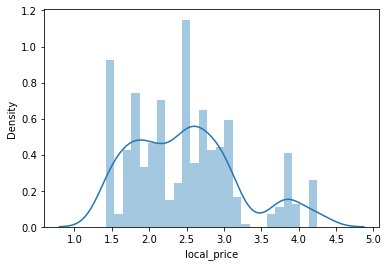

In [14]:
# create a distribution plot for local price to check extreme values
sns.distplot(df_ee['local_price'], bins=25)

In [15]:
df_ee['local_price'].mean()

2.476100628930823

In [16]:
df_ee['local_price'].median()

2.48

In [17]:
df_ee['local_price'].min()

1.42

In [18]:
df_ee['local_price'].max()

4.25

/Users/r1121/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='variation_local', ylabel='Density'>

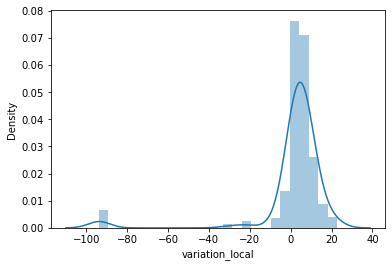

In [19]:
# create a distribution plot for price variation to check extreme values
sns.distplot(df_ee['variation_local'], bins=25)

In [20]:
df_ee['variation_local'].mean()

1.632851153039831

In [21]:
df_ee['variation_local'].median()

4.3

In [22]:
df_ee['variation_local'].min()

-93.94

From plot above, we can see there is an observation out of the bell-shaped distribution. Since it makes the statistics skewed greatly, it shall be considered as 'outlier'.

<AxesSubplot:xlabel='variation_local', ylabel='variation_local'>

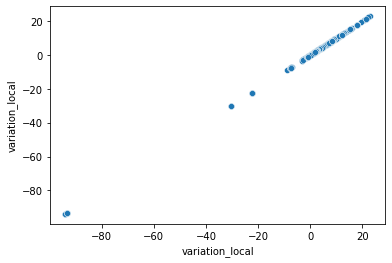

In [23]:
# creat a scatterplot to see the outliers.

sns.scatterplot(x='variation_local', y='variation_local', data = df_ee)

In [24]:
# check the number of outliers.
df_ee_ex = df_ee[df_ee['variation_local'] < -40]
df_ee_ex.shape

(15, 9)

In [25]:
df_ee_ex.head(15)

,_id,country,food_type,baseline_local,local_price,variation_local,local_currency,local_range,date
44127,44128,Seychelles,Hen eggs in shell (12),33.35,2.16,-93.52,€,1.30-2.76,2020-07-19
44154,44155,Seychelles,Hen eggs in shell (12),33.35,2.02,-93.94,€,1.30-2.76,2021-04-04
44165,44166,Seychelles,Hen eggs in shell (12),33.35,2.16,-93.52,€,1.30-2.76,2020-07-05
44177,44178,Seychelles,Hen eggs in shell (12),33.35,2.16,-93.52,€,1.30-2.76,2020-08-16
44194,44195,Seychelles,Hen eggs in shell (12),33.35,2.16,-93.52,€,1.30-2.76,2020-06-28
44205,44206,Seychelles,Hen eggs in shell (12),33.35,2.16,-93.52,€,1.30-2.76,2020-11-08
44219,44220,Seychelles,Hen eggs in shell (12),33.35,2.16,-93.52,€,1.30-2.76,2021-01-10
44235,44236,Seychelles,Hen eggs in shell (12),33.35,2.02,-93.94,€,1.30-2.76,2021-03-07
44246,44247,Seychelles,Hen eggs in shell (12),33.35,2.16,-93.52,€,1.30-2.76,2020-09-27
44254,44255,Seychelles,Hen eggs in shell (12),33.35,2.16,-93.52,€,1.30-2.76,2020-10-18


In [26]:
# remove the outlier
df_ee_no_ex = df_ee[df_ee['variation_local']>= -40]
df_ee_no_ex.shape

(462, 9)

In [27]:
# export the new dataset about eggs price in Europe
df_ee_no_ex.to_csv(r'/Users/r1121/Desktop/CF/11-2023Food Price Project/Data/Modified/egg_price_eu.csv')

## Scatterplot between price and house age

Text(0, 0.5, 'local_price')

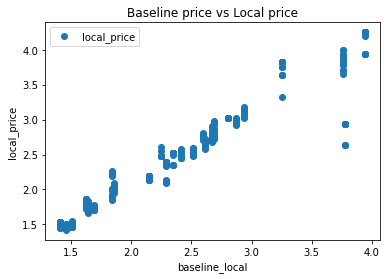

In [28]:
df_ee_no_ex.plot(y='local_price', x='baseline_local', style='o')
plt.title('Baseline price vs Local price')
plt.ylabel('local_price')

Hypothesis: Local price has a positive relationship with baseline price. In other words, lower baseline pirce, lower local price.

# Machine learning- Linear regression

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_ee_no_ex['baseline_local'].values.reshape(-1,1)
y = df_ee_no_ex['local_price'].values.reshape(-1,1)

In [30]:
X

array([[3.94],
       [2.35],
       [3.94],
       [2.35],
       [3.94],
       [3.78],
       [2.35],
       [3.94],
       [2.35],
       [3.94],
       [2.35],
       [3.94],
       [2.35],
       [3.78],
       [3.94],
       [2.35],
       [2.35],
       [3.94],
       [3.78],
       [2.35],
       [3.94],
       [3.78],
       [2.35],
       [3.94],
       [3.78],
       [2.35],
       [3.78],
       [3.94],
       [3.94],
       [2.35],
       [2.35],
       [3.94],
       [3.78],
       [3.78],
       [3.94],
       [2.35],
       [2.35],
       [3.94],
       [3.78],
       [2.35],
       [3.94],
       [2.35],
       [3.94],
       [2.35],
       [3.94],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.25],
       [2.69],
       [2.69],
       [2.69],
       [2.

In [31]:
y

array([[4.25],
       [2.52],
       [3.94],
       [2.35],
       [4.25],
       [2.63],
       [2.52],
       [4.25],
       [2.52],
       [4.25],
       [2.52],
       [4.2 ],
       [2.52],
       [2.94],
       [4.25],
       [2.52],
       [2.52],
       [4.25],
       [2.94],
       [2.52],
       [4.25],
       [2.63],
       [2.52],
       [4.25],
       [2.94],
       [2.52],
       [2.94],
       [4.25],
       [4.25],
       [2.52],
       [2.52],
       [4.25],
       [2.94],
       [2.63],
       [4.25],
       [2.52],
       [2.35],
       [3.94],
       [2.94],
       [2.52],
       [4.25],
       [2.49],
       [3.94],
       [2.35],
       [3.94],
       [2.48],
       [2.48],
       [2.48],
       [2.48],
       [2.48],
       [2.48],
       [2.48],
       [2.48],
       [2.48],
       [2.61],
       [2.48],
       [2.48],
       [2.55],
       [2.48],
       [2.48],
       [2.48],
       [2.48],
       [2.48],
       [2.81],
       [2.74],
       [2.97],
       [2.

In [32]:
# Split X, y array into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [33]:
# create a regression object.
regression = LinearRegression()

In [34]:
# Fit the training set into the regression object.
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict y with X_test
y_predicted =regression.predict(X_test)

Text(0.5, 1.0, 'Baseline price vs Local price')

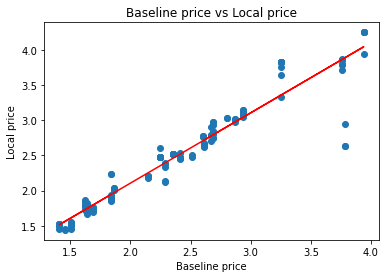

In [36]:
# Create a plot that shows the regression line from the model on the test set.
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predicted, color='red')
plt.xlabel('Baseline price')
plt.ylabel('Local price')
plt.title('Baseline price vs Local price')

In [37]:
# Check the model summary statistics of the predicted results.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [38]:
print('Slope:', regression.coef_)
print('Root mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[0.99954015]]
Root mean squared error: 0.04796228604465339
R2 score: 0.911032217629022


According r2 score, we know that this linear reggression model is a great fit in this situation at all. Over 90% of data points fit in this model.

In [39]:
# Compare y_test and y_predicted
comp_test_predicted = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predicted.flatten()})

In [40]:
comp_test_predicted.head(20)

,Actual,Predicted
0,2.67,2.714600
1,2.63,3.884062
2,2.84,2.794563
3,1.90,1.944954
4,3.05,3.044449
5,3.83,3.354306
6,2.34,2.394747
7,2.93,2.794563
8,2.48,2.614646
9,2.45,2.514692


Ideally, local food price ought to be very close to its baseline price. Value of the food products impacts their prices. In the healthy economy countries, we could consider choosing suppliers by local baseline price.